# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [5]:
cities

['jamestown',
 'rikitea',
 'oktyabrskoye',
 'shimoda',
 'isangel',
 'tasiilaq',
 'hobart',
 'kapaa',
 'vredendal',
 'punta arenas',
 'albany',
 'port-gentil',
 'lasa',
 'saskylakh',
 'saleaula',
 'pacific grove',
 'puerto ayora',
 'upernavik',
 'tiksi',
 'ahipara',
 'filottrano',
 'rosario do sul',
 'khorramshahr',
 'khatanga',
 'barrow',
 'esperance',
 'gashua',
 'san policarpo',
 'talnakh',
 'yumen',
 'clyde river',
 'ushuaia',
 'mayo',
 'ixtapa',
 'kalabo',
 'naftah',
 'cape town',
 'boca do acre',
 'teruel',
 'port elizabeth',
 'finschhafen',
 'ambon',
 'vaini',
 'beloha',
 'tieli',
 'seoul',
 'waddan',
 'tumannyy',
 'leningradskiy',
 'bredasdorp',
 'price',
 'talakan',
 'kirakira',
 'thompson',
 'hermanus',
 'ponta do sol',
 'tuktoyaktuk',
 'bejar',
 'araouane',
 'christchurch',
 'bluff',
 'mataura',
 'busselton',
 'saint anthony',
 'acajutla',
 'beisfjord',
 'port alfred',
 'marcona',
 'narsaq',
 'odweyne',
 'acarau',
 'butaritari',
 'naze',
 'saint-francois',
 'georgetown',
 'sa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
# Get weather data
units = "metric"
resp = dict()
i = 0
for city in cities:
    print(str(i) + ": " + city)
    i += 1
    resp[city] = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units={units}").json()
    

0: jamestown
1: rikitea
2: oktyabrskoye
3: shimoda
4: isangel
5: tasiilaq
6: hobart
7: kapaa
8: vredendal
9: punta arenas
10: albany
11: port-gentil
12: lasa
13: saskylakh
14: saleaula
15: pacific grove
16: puerto ayora
17: upernavik
18: tiksi
19: ahipara
20: filottrano
21: rosario do sul
22: khorramshahr
23: khatanga
24: barrow
25: esperance
26: gashua
27: san policarpo
28: talnakh
29: yumen
30: clyde river
31: ushuaia
32: mayo
33: ixtapa
34: kalabo
35: naftah
36: cape town
37: boca do acre
38: teruel
39: port elizabeth
40: finschhafen
41: ambon
42: vaini
43: beloha
44: tieli
45: seoul
46: waddan
47: tumannyy
48: leningradskiy
49: bredasdorp
50: price
51: talakan
52: kirakira
53: thompson
54: hermanus
55: ponta do sol
56: tuktoyaktuk
57: bejar
58: araouane
59: christchurch
60: bluff
61: mataura
62: busselton
63: saint anthony
64: acajutla
65: beisfjord
66: port alfred
67: marcona
68: narsaq
69: odweyne
70: acarau
71: butaritari
72: naze
73: saint-francois
74: georgetown
75: saint-jose

575: lavrentiya
576: conil
577: taixing
578: srivardhan
579: gulshat
580: egvekinot
581: oranjemund
582: chikwawa
583: sorvag
584: cayenne
585: sisimiut
586: olinda
587: ericeira
588: hamilton
589: beaverlodge
590: saint peter
591: necochea
592: lulea
593: axim
594: north platte
595: jega
596: ligayan
597: jambi
598: babanusah
599: borba
600: aktas
601: rianxo
602: abu dhabi
603: vaitupu
604: quchan
605: humaita
606: comodoro rivadavia
607: anloga
608: riyadh
609: puerto baquerizo moreno
610: yendi
611: stoyba
612: simpang
613: vila do maio
614: kendari
615: wuwei
616: rosetta
617: kidal
618: kenosha
619: easton
620: asfi
621: capreol
622: frontera
623: maghama
624: tiznit
625: harqalah
626: sobolevo


In [95]:
resp

{'jamestown': {'coord': {'lon': -79.24, 'lat': 42.1},
  'weather': [{'id': 501,
    'main': 'Rain',
    'description': 'moderate rain',
    'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 16.49,
   'feels_like': 14.29,
   'temp_min': 16,
   'temp_max': 16.67,
   'pressure': 1016,
   'humidity': 87},
  'visibility': 10000,
  'wind': {'speed': 5.1, 'deg': 160},
  'rain': {'1h': 0.25},
  'clouds': {'all': 90},
  'dt': 1599485295,
  'sys': {'type': 1,
   'id': 4588,
   'country': 'US',
   'sunrise': 1599475761,
   'sunset': 1599522038},
  'timezone': -14400,
  'id': 5122534,
  'name': 'Jamestown',
  'cod': 200},
 'rikitea': {'coord': {'lon': -134.97, 'lat': -23.12},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'base': 'stations',
  'main': {'temp': 22.7,
   'feels_like': 23.34,
   'temp_min': 22.7,
   'temp_max': 22.7,
   'pressure': 1019,
   'humidity': 85,
   'sea_level': 1019,
   'grnd_level': 1016},
  'visibility': 1000

In [19]:
resp['jamestown']


['jamestown', 42.1, -79.24, 18.89, 72, 20, 4.6, 'US', 1599477874]

In [96]:
df = dict()
for d in resp:
    if type(resp[d]) == list:
        continue
    
    if resp[d]['cod'] == '404':
        continue
    df[d] = [resp[d]['coord']['lat'],
            resp[d]['coord']['lon'],
            resp[d]['main']['temp_max'],
            resp[d]['main']['humidity'],
            resp[d]['clouds']['all'],
            resp[d]['wind']['speed'],
            resp[d]['sys']['country'],
            resp[d]['dt']
            ]
df

{'jamestown': [42.1, -79.24, 16.67, 87, 90, 5.1, 'US', 1599485295],
 'rikitea': [-23.12, -134.97, 22.7, 85, 7, 4.39, 'PF', 1599485454],
 'oktyabrskoye': [43.06, 44.74, 25.56, 65, 40, 3, 'RU', 1599485454],
 'shimoda': [34.67, 138.95, 22.78, 94, 89, 4.37, 'JP', 1599485454],
 'isangel': [-19.55, 169.27, 22.03, 83, 100, 5.81, 'VU', 1599485455],
 'tasiilaq': [65.61, -37.64, 3, 93, 7, 3.1, 'GL', 1599485455],
 'hobart': [-42.88, 147.33, 16.11, 51, 100, 5.7, 'AU', 1599485455],
 'kapaa': [22.08, -159.32, 27, 78, 75, 4.6, 'US', 1599485456],
 'vredendal': [-31.67, 18.5, 29.45, 21, 0, 5.11, 'ZA', 1599485456],
 'punta arenas': [-53.15, -70.92, 5, 86, 100, 2.6, 'CL', 1599485456],
 'albany': [42.6, -73.97, 20, 69, 0, 0.89, 'US', 1599485304],
 'port-gentil': [-0.72, 8.78, 28, 69, 40, 5.21, 'GA', 1599485457],
 'lasa': [46.62, 10.7, 16.67, 71, 40, 4.1, 'IT', 1599485457],
 'saskylakh': [71.92, 114.08, 6.36, 63, 0, 4, 'RU', 1599485457],
 'pacific grove': [36.62, -121.92, 21, 60, 1, 1.96, 'US', 1599485458]

In [97]:
cols = ['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']      
df = pd.DataFrame(df, index=cols).T
df.to_csv("cities.csv")
df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
jamestown,42.1,-79.24,16.67,87,90,5.1,US,1599485295
rikitea,-23.12,-134.97,22.7,85,7,4.39,PF,1599485454
oktyabrskoye,43.06,44.74,25.56,65,40,3,RU,1599485454
shimoda,34.67,138.95,22.78,94,89,4.37,JP,1599485454
isangel,-19.55,169.27,22.03,83,100,5.81,VU,1599485455
...,...,...,...,...,...,...,...,...
capreol,46.71,-80.92,17.78,93,75,6.7,CA,1599485626
frontera,26.93,-101.45,22.78,88,100,0.45,MX,1599485626
tiznit,29.58,-9.5,35.97,17,0,4.37,MA,1599485571
harqalah,36.03,10.51,30,42,20,5.1,TN,1599485627


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,576.00,576.00,576.0,576,576,576.0,576,576
unique,556.00,569.00,327.0,92,89,280.0,118,247
top,65.58,70.83,26.0,83,0,2.1,RU,1599481628
freq,2.00,2.00,14.0,27,84,27.0,70,5


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

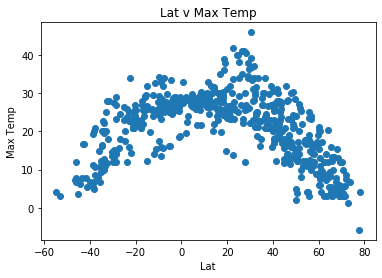

In [88]:
plt.scatter(df.Lat, df["Max Temp"])
plt.title("Lat v Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.savefig("LatTemp.png")

## Latitude vs. Humidity Plot

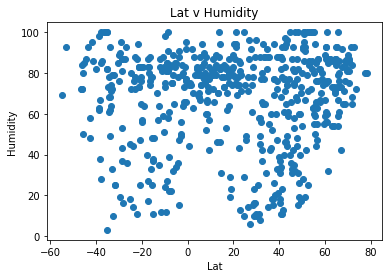

In [89]:
plt.scatter(df.Lat, df.Humidity)
plt.title("Lat v Humidity")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.savefig("LatHumid.png")

## Latitude vs. Cloudiness Plot

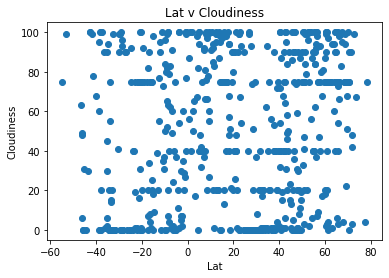

In [90]:
plt.scatter(df.Lat, df.Cloudiness)
plt.title("Lat v Cloudiness")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.savefig("LatCloud.png")

## Latitude vs. Wind Speed Plot

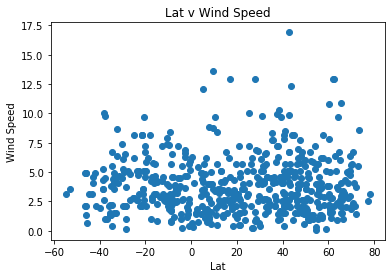

In [91]:
plt.scatter(df.Lat, df["Wind Speed"])
plt.title("Lat v Wind Speed")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.savefig("LatWind.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg_plot(x,y):
    lin = linregress(x.astype(float), y.astype(float))

    plt.scatter(x, y)
    #print([x.min(), x.min()*lin[0] + lin[1], x.max(), x.max()*lin[0] + lin[1]])
    plt.plot([x.min(),x.max()], [x.min()*lin[0] + lin[1], x.max()*lin[0] + lin[1]], color='r')
    plt.text(x.min(),y.max()-1,f"y={lin[0]}x + {lin[1]}", color='r')
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

[0.52, 34.31305948065736, 78.22, 6.555718670621712]


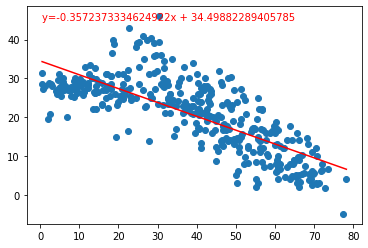

<Figure size 432x288 with 0 Axes>

In [105]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl["Max Temp"])
plt.savefig("NorthTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

[-54.8, 6.758640148097911, -0.6, 30.29086848589644]


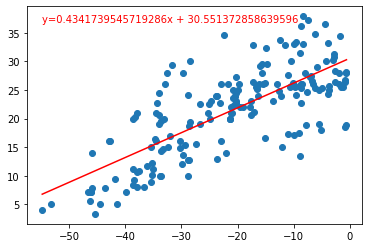

<Figure size 432x288 with 0 Axes>

In [104]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl["Max Temp"])
plt.savefig("SouthTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

[0.52, 65.4240622425111, 78.22, 71.90599701484693]


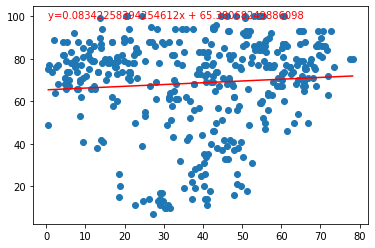

<Figure size 432x288 with 0 Axes>

In [103]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl.Humidity)
plt.savefig("NorthHumid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

[-54.8, 71.4275014469796, -0.6, 61.32823260922776]


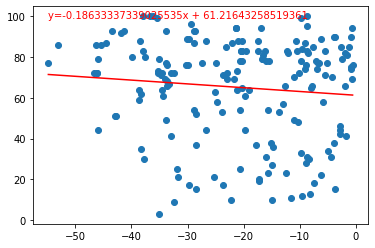

<Figure size 432x288 with 0 Axes>

In [102]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl.Humidity)
plt.savefig("SouthHumid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

[0.52, 45.47893408632811, 78.22, 56.274545569731146]


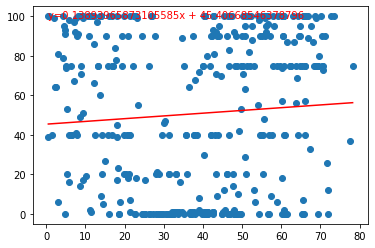

<Figure size 432x288 with 0 Axes>

In [101]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl.Cloudiness)
plt.savefig("NorthCloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

[-54.8, 35.610495291447705, -0.6, 45.88516719972798]


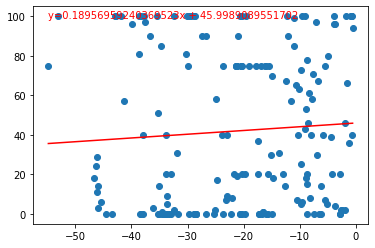

<Figure size 432x288 with 0 Axes>

In [100]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl.Cloudiness)
plt.savefig("SouthCloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

[0.52, 3.5955646695082826, 78.22, 4.037877936101512]


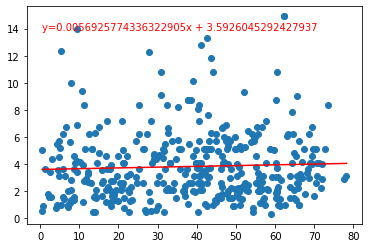

<Figure size 432x288 with 0 Axes>

In [99]:
dfl = df.loc[df.Lat > 0,:]
linreg_plot(dfl.Lat,dfl["Wind Speed"])
plt.savefig("NorthWind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

[-54.8, 4.25688926602198, -0.6, 3.8893050779236664]


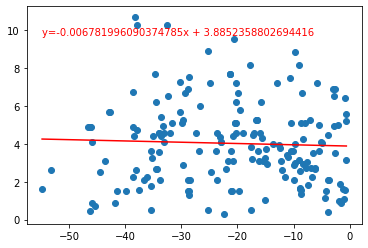

<Figure size 432x288 with 0 Axes>

In [98]:
dfl = df.loc[df.Lat < 0,:]
linreg_plot(dfl.Lat,dfl["Wind Speed"])
plt.savefig("SouthWind.png")